<a href="https://colab.research.google.com/github/KarolainCabrera/mineria/blob/develop_2020/Test_Mineria_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio y desarrollo de visualizaciones de información de precipitaciones en Chile y hemisferio sur
### DIEGO GALLEGOS - ALODI JUGLÀ SERRAT - KAROLAIN CABRERA

El presente notebook es un registro del trabajo realizado por los autores, utilizando un dataset de precipitaciones acumuladas diarias, obtenidas de distintos centros de medición presentes en Chile y en el hemisferio sur. El objetivo central del presente es realizar análisis y visualizaciones expositivas con la información a disposición.

La data ha sido recopilado por el Centro de Ciencia del Clima y la Resiliencia (CR)2.

Dataset: https://www.cr2.cl/datos-de-precipitacion/

## Almacenamiento, carga y preprocesado del dataset

El dataset obtenido es alojado en Drive para realizar una carga en línea. Se tienen dos archivos en formato csv, uno con la metadata de los centros de medición y el otro con las mediciones diaras recopiladas por el (CR)2.

Enlace:
*   Precipitation Data 2020: https://drive.google.com/file/d/1SLesT4pD-nPitwf-0p69CyLjYa9kUf9h/view
*   Stations: https://drive.google.com/file/d/1p4e_IfSMoFjINGJ27KfZSJb96hCkc5Co/view  

usp=sharing

Una vez cargados los archivos se estudian y se procede a la limpieza; quitar data repetida y rellenar valores faltantes.

In [21]:
%%shell
# STATIONS DATA 2020
# download the Custom dataset from created Drive folder.
wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1p4e_IfSMoFjINGJ27KfZSJb96hCkc5Co' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1p4e_IfSMoFjINGJ27KfZSJb96hCkc5Co" -O cr2_prDaily_2020_stations_ghcn.csv && rm -rf /tmp/cookies.txt

--2023-06-28 23:46:07--  https://docs.google.com/uc?export=download&confirm=&id=1p4e_IfSMoFjINGJ27KfZSJb96hCkc5Co
Resolving docs.google.com (docs.google.com)... 74.125.124.113, 74.125.124.101, 74.125.124.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c53os7b21q00pqrrtkj2ifdvgkkbi2au/1687995900000/10249583459744317057/*/1p4e_IfSMoFjINGJ27KfZSJb96hCkc5Co?e=download&uuid=2e3cb8b5-1ee6-4791-993e-47fb77f85078 [following]
--2023-06-28 23:46:07--  https://doc-0o-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c53os7b21q00pqrrtkj2ifdvgkkbi2au/1687995900000/10249583459744317057/*/1p4e_IfSMoFjINGJ27KfZSJb96hCkc5Co?e=download&uuid=2e3cb8b5-1ee6-4791-993e-47fb77f85078
Resolving doc-0o-30-docs.googleusercontent.com (doc-0o-30-docs.googleusercontent.com)... 209.85.234.132, 2

In [22]:
%%shell
# PRECIPITATION DATA 2020
# download the Custom dataset from created Drive folder
wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SLesT4pD-nPitwf-0p69CyLjYa9kUf9h' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1SLesT4pD-nPitwf-0p69CyLjYa9kUf9h" -O cr2_prDaily_2020ghcn.csv && rm -rf /tmp/cookies.txt

--2023-06-28 23:46:10--  https://docs.google.com/uc?export=download&confirm=t&id=1SLesT4pD-nPitwf-0p69CyLjYa9kUf9h
Resolving docs.google.com (docs.google.com)... 74.125.124.113, 74.125.124.101, 74.125.124.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cm133avnc9o5a18qsckssvgks5km1qot/1687995900000/10249583459744317057/*/1SLesT4pD-nPitwf-0p69CyLjYa9kUf9h?e=download&uuid=a7fc362a-37d8-4f4c-bd19-2b2612fdaf5d [following]
--2023-06-28 23:46:10--  https://doc-10-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cm133avnc9o5a18qsckssvgks5km1qot/1687995900000/10249583459744317057/*/1SLesT4pD-nPitwf-0p69CyLjYa9kUf9h?e=download&uuid=a7fc362a-37d8-4f4c-bd19-2b2612fdaf5d
Resolving doc-10-30-docs.googleusercontent.com (doc-10-30-docs.googleusercontent.com)... 209.85.234.132, 

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/cr2_prDaily_2020_stations_ghcn.csv")
df_precip = pd.read_csv("/content/cr2_prDaily_2020ghcn.csv")

<ipython-input-23-0f8be25e7d49>:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

In [4]:
df_precip.head(20)

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
0,institucion,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,...,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN,GHCN
1,fuente,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,...,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp,ghcn_ftp
2,nombre,Visviri,Villa Industrial (Tacora),Humapalca,Rio Caracarani En Humapalca,Alcerreca,Rio Lluta En Alcerreca,Caquena,Puquios,Pacollo,...,Mcmurdo Sound Naf,Little America,Vostok,Little Rockford,Plateau Stn,Byrd Stn,Brockton Stn,Little Jeana Stn,Beardmore Camp,Amundsen-Scott
3,altura,4080,4080,3980,3908,3990,3550,4400,3750,4185,...,24,32,3488,651,3505,1543,101,54,59,-1000
4,latitud,-17.595,-17.7719,-17.835,-17.8428,-17.9931,-18.0036,-18.0542,-18.1747,-18.1769,...,-77.8833,-78.2,-78.45,-79.25,-79.4667,-80.0167,-80.0167,-81.3833,-83.4,-90.0
5,longitud,-69.4831,-69.7244,-69.7039,-69.6994,-69.6594,-69.6331,-69.2017,-69.7439,-69.5092,...,166.733,-162.25,106.867,-147.5,40.5833,-119.533,-178.417,170.75,174.75,0.0
6,codigo_cuenca,10,12,12,12,12,12,10,11,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,nombre_cuenca,Altiplanicas,Rio Lluta,Rio Lluta,Rio Lluta,Rio Lluta,Rio Lluta,Altiplanicas,Quebrada De La Concordia,Rio Lluta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,codigo_sub_cuenca,100,120,120,120,120,120,100,111,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,nombre_sub_cuenca,Entre Limite Peru-Bolivia Y Rio Lauca,Rio Lluta Alto,Rio Lluta Alto,Rio Lluta Alto,Rio Lluta Alto,Rio Lluta Alto,Entre Limite Peru-Bolivia Y Rio Lauca,Quebrada De La Concordia,Rio Lluta Alto,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica
0,1000005,DGA,dga_web,Visviri,4080,-17.5950,-69.4831,10.0,Altiplanicas,100.0,Entre Limite Peru-Bolivia Y Rio Lauca,1968-05-01,2020-03-31,18258,2017-08-02
1,1200002,DGA,dga_web,Villa Industrial (Tacora),4080,-17.7719,-69.7244,12.0,Rio Lluta,120.0,Rio Lluta Alto,1975-01-01,2019-11-30,15794,-
2,1200003,DGA,dga_web,Humapalca,3980,-17.8350,-69.7039,12.0,Rio Lluta,120.0,Rio Lluta Alto,1971-12-01,2019-11-30,17362,-
3,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12.0,Rio Lluta,120.0,Rio Lluta Alto,2013-06-01,2020-03-31,2211,2017-04-04
4,1201010,DGA,dga_web,Alcerreca,3990,-17.9931,-69.6594,12.0,Rio Lluta,120.0,Rio Lluta Alto,1971-01-01,2019-11-30,17563,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,AYW00068201,GHCN,ghcn_ftp,Byrd Stn,1543,-80.0167,-119.5330,NaN,NaN,NaN,NaN,1957-01-10,1988-01-31,5729,-
1250,AYW00068701,GHCN,ghcn_ftp,Brockton Stn,101,-80.0167,-178.4170,NaN,NaN,NaN,NaN,1966-01-01,1969-12-28,276,-
1251,AYW00088703,GHCN,ghcn_ftp,Little Jeana Stn,54,-81.3833,170.7500,NaN,NaN,NaN,NaN,1964-10-04,1966-01-22,226,-
1252,AYW00088702,GHCN,ghcn_ftp,Beardmore Camp,59,-83.4000,174.7500,NaN,NaN,NaN,NaN,1959-10-18,1963-02-28,417,-


In [6]:
# Drop the metadata since it's already contained in the stations file
# We save a csv file to load the data again, this time the values will be
# assigned the right dtype. This approach showed to be faster

df_precip.drop(df_precip.index[:14]).reset_index(drop=True).to_csv('data.csv',
                                                                   index=False)
df_data = pd.read_csv('data.csv')
df_data['codigo_estacion'] = pd.to_datetime(
    df_data['codigo_estacion'].astype(str),
    format='%Y-%m-%d')
df_data

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
0,1900-01-01,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,1900-01-02,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,1900-01-03,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,1900-01-04,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,1900-01-05,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43915,2020-03-27,0.2,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43916,2020-03-28,0.8,-9999.0,-9999.0,0.1,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43917,2020-03-29,0.4,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43918,2020-03-30,0.0,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.dtypes

codigo_estacion    datetime64[ns]
01000005                  float64
01200002                  float64
01200003                  float64
01201005                  float64
                        ...      
AYW00068201               float64
AYW00068701               float64
AYW00088703               float64
AYW00088702               float64
AYW00090001               float64
Length: 1255, dtype: object

In [ ]:
df_data.isna().describe()

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
count,43920,43920,43920,43920,43920,43920,43920,43920,43920,43920,...,43920,43920,43920,43920,43920,43920,43920,43920,43920,43920
unique,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,43920,43920,43920,43920,43920,43920,43920,43920,43920,43920,...,43829,43829,43829,43829,43829,43829,43829,43829,43829,43829


In [ ]:
df_data = df_data.fillna(-9999.0)
df_data.isna().describe()

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
count,43920,43920,43920,43920,43920,43920,43920,43920,43920,43920,...,43920,43920,43920,43920,43920,43920,43920,43920,43920,43920
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,43920,43920,43920,43920,43920,43920,43920,43920,43920,43920,...,43920,43920,43920,43920,43920,43920,43920,43920,43920,43920


In [ ]:
df_data

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
0,1900-01-01,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,1900-01-02,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,1900-01-03,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,1900-01-04,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,1900-01-05,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43915,2020-03-27,0.2,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43916,2020-03-28,0.8,-9999.0,-9999.0,0.1,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43917,2020-03-29,0.4,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
43918,2020-03-30,0.0,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


## Análisis de la escasez (sparsity) del dataset

Se cuenta con un dataset bastante ralo, donde muchas mediciones no fueron realizadas o registradas, esto por supuesto es inoportuno en primera instancia, y se deben crear estrategias para aprovechar la data con la que se cuenta. Para ello primero mostramos mediciones y visualizaciones de la escasez (sparsity) del dataset. La escasez se calcula con la siguiente expresión:

$$
sparsity = \frac{\sum x_{missing}}{\sum x_{missing} + \sum x_{present}}
$$

In [ ]:
# We measure the sparsity of the dataset

count = (df_data.iloc[:, 1:] < -100).sum().sum()
sparsity = count/df_data.iloc[:, 1:].size

sparsity

0.7956231316617426

In [ ]:
# A simple function to measure the sparsity from and to fixed rows in the
# dataset

max_dims = df_data.shape

def get_sparsity(X, irow=0, icol=0, frow=(max_dims[0]-1), fcol=(max_dims[1]-1)):
  count = (X.iloc[irow : frow, icol : fcol] < -100).sum().sum()
  sparsity = count/X.iloc[irow : frow, icol : fcol].size
  return sparsity


In [ ]:
import matplotlib.pyplot as plt

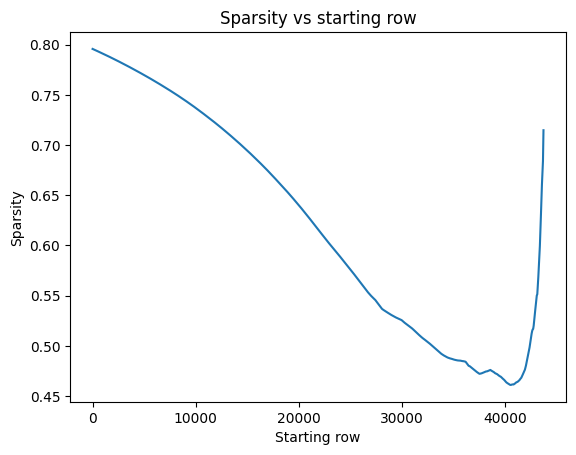

In [ ]:
# In the assumption that in the early years considered in the dataset
# should be the majority of the empty measures, we plot the sparsity
# in function of the starting row

def plot_sparsity(X, step=50, frow=(max_dims[0]-1), icol=0):
  sparsity_arr = []
  initial_row_arr = [row for row in range(1,frow-200,step)]
  for ini in initial_row_arr:
    sparsity_arr.append(get_sparsity(X, irow=ini, icol=icol, frow=frow))
  plt.plot(initial_row_arr, sparsity_arr)
  plt.title('Sparsity vs starting row')
  plt.xlabel('Starting row')
  plt.ylabel('Sparsity')
  plt.show()
  return

plot_sparsity(df_data, icol=1)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = px.bar(df, x='codigo_estacion', y='cantidad_observaciones')
fig.show()

## Observaciones visuales de los datos

Con el objetivo de visualizar dónde hay datos y su densidad, se hace un gráfico que nos permite analizar el intervalo de tiempo dónde tiene más sentido usar los datos.
Inicialmente nos basamos en un análisis visual de las proyecciones realizadas, se considera la idea de utilizar una métrica para definir un punto de partida para el dataset.


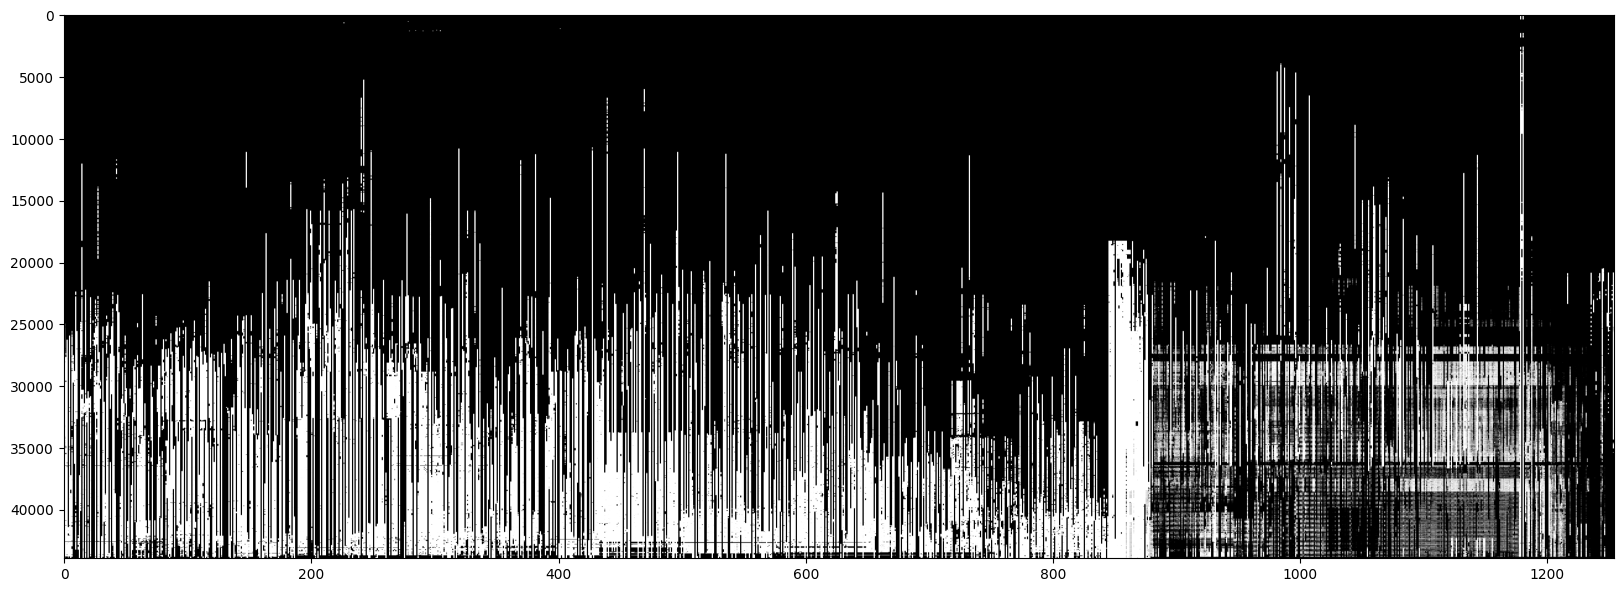

In [ ]:
# Now we try to observe where is the data really present

condition = df_data.iloc[:, 1:] > -100
binary_mask = condition.astype(int)
plt.figure(figsize=(20,60))
sparse_img = plt.imshow(binary_mask.values, cmap='gray',vmin=0, vmax=1, aspect=0.01)

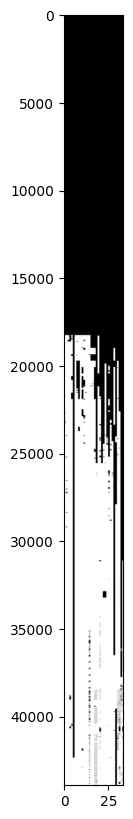

In [ ]:
condition = df_data.iloc[:, 846:880] > -100
binary_mask = condition.astype(int)
plt.figure(figsize=(10,10))
sparse_img = plt.imshow(binary_mask.values, cmap='gray',vmin=0, vmax=1, aspect=0.01)

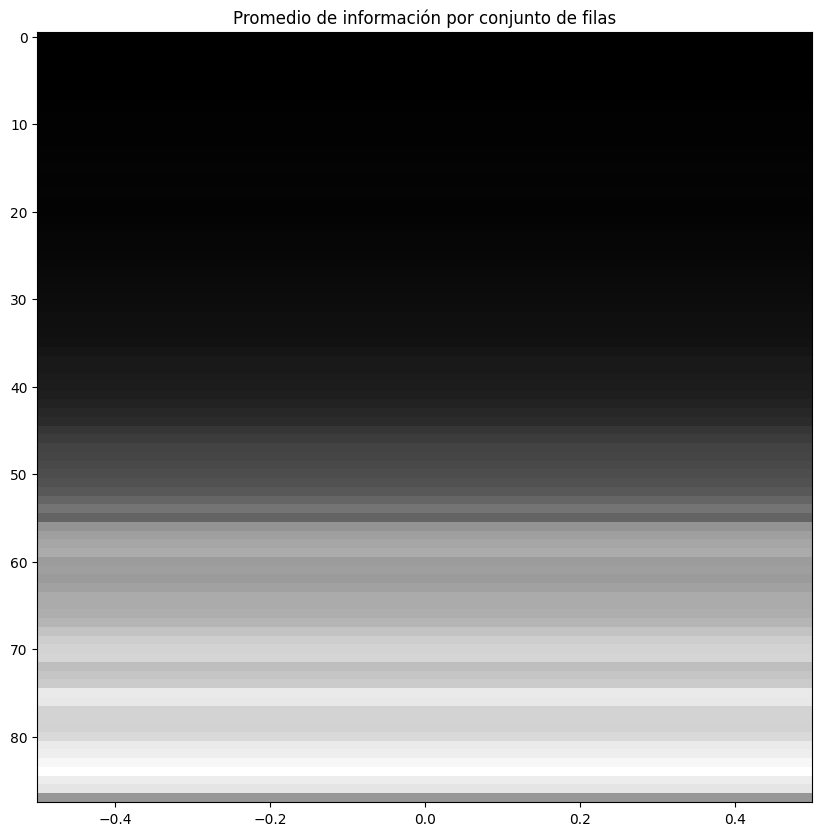

In [ ]:
# We create a function that calculates the average data presence within a group
# of consecutive rows

def row_avg_plot(X, rows_num=100):
  means = []

  for n in range(0, len(X), rows_num):
    means.append(X.iloc[n:n+rows_num,
                        :].mean().mean())
  plt.figure(figsize=(10,10))
  plt.title('Promedio de información por conjunto de filas')
  plt.imshow(np.reshape(means, (len(means), 1)), cmap='gray',
                      vmin=0, vmax=max(means), aspect='auto')

row_avg_plot(binary_mask,500)


Con el análisis visual podemos formular una primera hipótesis.

**Hipotesis**: Las partes densas de información e ininterrumpidas son pruducto del inicio de mediciones automáticas en las estaciones de medición. Ésto se puede ver especialmente en el bloque de las estaciones más australes de Chile.

In [ ]:
import plotly.express as px

df_stations = df.loc[:, ["codigo_estacion", "latitud", "longitud", "altura","codigo_cuenca"]]


fig = px.scatter_geo(
    df_stations,
    lat="latitud",
    lon="longitud",
    color="altura",
    projection="natural earth",
    )
fig.show()

## Consideraciones a corto plazo

- Se tiene un dataset muy ralo, por lo que es ineficiente, en términos de almacenamiento, considerar cada medición faltante almacenando -9999.0. Entonces se tiene en consideración almacenar solo la información existente en una estructura de datos más eficiente (por ejemplo listas dobles), aunque se debe considerar que el procesamiento de la data es más eficiente utilizando dataframes en pandas.

- Se deben idear estrategias para aprovechar la data que si está presente, por ejemplo agrupar por zonas y fechas donde exista información, para realizar las visualizaciones.

- Se considera también como opción válida el truncamiento del dataset de forma de tener una escasez reducida. Luego se contempla la opción de rellenar la información faltante con información sintética, que no afecte la tendencia y medidas que presenta la información que si está presente.

In [ ]:
print(df_data.columns.values)

['codigo_estacion' '01000005' '01200002' ... 'AYW00088703' 'AYW00088702'
 'AYW00090001']


## Separación de dataset en Chile y fuerda de Chile

In [ ]:
df.iloc[[df.fuente.eq(fuente).idxmax() for fuente in df['fuente'].value_counts().index]]

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica
0,1000005,DGA,dga_web,Visviri,4080,-17.5950,-69.4831,10.0,Altiplanicas,100.0,Entre Limite Peru-Bolivia Y Rio Lauca,1968-05-01,2020-03-31,18258,2017-08-02
879,COM00080002,GHCN,ghcn_ftp,El Embrujo,3,13.3570,-81.3580,NaN,NaN,NaN,NaN,1983-11-14,2020-03-29,2481,-
845,180005,DMC,dmc_merge,Chacalluta Arica Ap.,63,-18.3514,-70.3358,10.0,Altiplanicas,100.0,Entre Limite Peru - Bolivia Y Rio Lauca,1950-01-01,2020-03-31,25566,-
867,220002,DMC,dmc_web,El Loa Calama Ad.,2293,-22.4989,-68.9072,20.0,Fronterizas Salar Michincha-R.Loa,200.0,Salar De Ollague,1966-12-31,2020-03-31,18979,-


In [ ]:
print(list(df_data.columns))

['codigo_estacion', '01000005', '01200002', '01200003', '01201005', '01201010', '01201003', '01001005', '01110001', '01202009', '01020014', '01020013', '01020002', '01202012', '01202010', '01020015', '01020017', '01202011', '01020016', '01020018', '01010010', '01010009', '01010007', '01300005', '01010008', '01300004', '01300006', '01211006', '01300007', '01310018', '01310021', '01021002', '01021007', '01310022', '01300009', '01310019', '01300008', '01021001', '01030003', '01410011', '01410012', '01502007', '01502008', '01501001', '01610003', '01502006', '01610004', '01041004', '01041003', '01611002', '01611001', '01720004', '01720006', '01730020', '01730015', '01730007', '01730019', '01730016', '01042001', '01044001', '01730017', '01730018', '01042002', '01740001', '01050007', '01740002', '01750003', '01050009', '01050004', '01700010', '01051004', '01750002', '01820001', '01051003', '01050010', '01700008', '01700009', '02113005', '01770001', '02113001', '01080001', '01080002', '0210503

In [ ]:
df_data.iloc[:,879]

0       -9999.0
1       -9999.0
2       -9999.0
3       -9999.0
4       -9999.0
          ...  
43915       0.0
43916       0.0
43917       0.0
43918       0.0
43919       0.3
Name: 530005, Length: 43920, dtype: float64

In [ ]:
df_reserva = df_data.drop(df_data.columns.values[1:846], axis=1).drop(
    df_data.columns.values[880:], axis=1)

df_data = df_data.drop(df_data.index.values[:30000], axis=0).reset_index(
    drop=True)

chile = df_data.columns.values[880:]
outter_chile = df_data.columns.values[1:880]
df_chile = df_data.drop(chile, axis=1)
df_outter = df_data.drop(outter_chile, axis=1)
df_outter

,codigo_estacion,COM00080002,CO000080001,COM00080035,VEM00080403,COM00080009,VEM00080421,COM00080028,VEM00080415,VE000080423,...,AYM00089664,AYW00067601,AYM00089606,AYW00067401,AYW00077401,AYW00068201,AYW00068701,AYW00088703,AYW00088702,AYW00090001
0,1982-02-20,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0
1,1982-02-21,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,...,2.3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0
2,1982-02-22,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,1.5,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0
3,1982-02-23,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,...,0.5,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0
4,1982-02-24,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,...,0.3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,2020-03-27,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
13916,2020-03-28,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
13917,2020-03-29,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
13918,2020-03-30,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [ ]:
df_chile

,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,...,330021,330019,330031,330030,370033,420004,430002,430004,510005,530005
0,1982-02-20,0.0,0.0,2.0,-9999.0,0.0,-9999.0,4.0,-9999.0,4.5,...,0.0,0.0,7.1,0.0,-9999.0,0.0,0.0,0.0,-9999.0,-9999.0
1,1982-02-21,8.0,0.0,0.0,-9999.0,0.0,-9999.0,14.0,-9999.0,6.5,...,0.0,0.0,0.0,0.0,-9999.0,0.0,0.0,0.0,-9999.0,-9999.0
2,1982-02-22,0.0,0.0,0.0,-9999.0,0.0,-9999.0,0.0,-9999.0,4.5,...,0.0,0.0,0.0,0.0,-9999.0,0.0,0.0,0.0,-9999.0,-9999.0
3,1982-02-23,0.0,0.0,0.0,-9999.0,0.0,-9999.0,0.0,-9999.0,0.0,...,0.0,0.0,7.4,0.0,-9999.0,0.0,0.0,0.0,-9999.0,-9999.0
4,1982-02-24,0.0,0.0,0.0,-9999.0,0.0,-9999.0,0.0,-9999.0,0.0,...,0.0,0.0,0.1,0.0,-9999.0,7.7,0.0,0.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,2020-03-27,0.2,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,0.0,0.0,1.0,0.2,0.0,-9999.0,0.4,1.0,5.5,0.0
13916,2020-03-28,0.8,-9999.0,-9999.0,0.1,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,0.0,0.0,16.0,0.0,0.0,-9999.0,0.2,0.2,0.1,0.0
13917,2020-03-29,0.4,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,0.0,0.0,0.0,0.0,0.0,-9999.0,0.0,0.0,0.0,0.0
13918,2020-03-30,0.0,-9999.0,-9999.0,0.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,...,0.0,0.0,0.0,0.0,0.0,-9999.0,0.0,0.0,0.0,0.0


In [31]:
df_reserva_meta = df.drop(df.index.values[1:845], axis=0).drop(
    df.index.values[880:], axis=0)



chile_meta = df.index.values[879:]
outter_chile_meta = df.index.values[0:879]
df_chile_meta = df.drop(chile_meta, axis=0)
df_outter_meta = df.drop(outter_chile_meta, axis=0)
df_outter_meta

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica
879,COM00080002,GHCN,ghcn_ftp,El Embrujo,3,13.3570,-81.358,NaN,NaN,NaN,NaN,1983-11-14,2020-03-29,2481,-
880,CO000080001,GHCN,ghcn_ftp,San Andres (Isla)/S,6,12.5830,-81.717,NaN,NaN,NaN,NaN,1962-01-01,2020-03-29,17687,-
881,COM00080035,GHCN,ghcn_ftp,Almirante Padilla,13,11.5260,-72.926,NaN,NaN,NaN,NaN,1973-01-05,2020-03-29,2827,-
882,VEM00080403,GHCN,ghcn_ftp,Jose Leonardo Chirinos,16,11.4150,-69.681,NaN,NaN,NaN,NaN,1959-01-21,2018-11-08,5640,-
883,COM00080009,GHCN,ghcn_ftp,Simon Bolivar,7,11.1200,-74.231,NaN,NaN,NaN,NaN,1964-10-03,2020-03-29,5309,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,AYW00068201,GHCN,ghcn_ftp,Byrd Stn,1543,-80.0167,-119.533,NaN,NaN,NaN,NaN,1957-01-10,1988-01-31,5729,-
1250,AYW00068701,GHCN,ghcn_ftp,Brockton Stn,101,-80.0167,-178.417,NaN,NaN,NaN,NaN,1966-01-01,1969-12-28,276,-
1251,AYW00088703,GHCN,ghcn_ftp,Little Jeana Stn,54,-81.3833,170.750,NaN,NaN,NaN,NaN,1964-10-04,1966-01-22,226,-
1252,AYW00088702,GHCN,ghcn_ftp,Beardmore Camp,59,-83.4000,174.750,NaN,NaN,NaN,NaN,1959-10-18,1963-02-28,417,-


In [32]:
df_chile_meta

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica
0,1000005,DGA,dga_web,Visviri,4080,-17.5950,-69.4831,10.0,Altiplanicas,100.0,Entre Limite Peru-Bolivia Y Rio Lauca,1968-05-01,2020-03-31,18258,2017-08-02
1,1200002,DGA,dga_web,Villa Industrial (Tacora),4080,-17.7719,-69.7244,12.0,Rio Lluta,120.0,Rio Lluta Alto,1975-01-01,2019-11-30,15794,-
2,1200003,DGA,dga_web,Humapalca,3980,-17.8350,-69.7039,12.0,Rio Lluta,120.0,Rio Lluta Alto,1971-12-01,2019-11-30,17362,-
3,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12.0,Rio Lluta,120.0,Rio Lluta Alto,2013-06-01,2020-03-31,2211,2017-04-04
4,1201010,DGA,dga_web,Alcerreca,3990,-17.9931,-69.6594,12.0,Rio Lluta,120.0,Rio Lluta Alto,1971-01-01,2019-11-30,17563,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,420004,DMC,dmc_web,Chaiten Ad.,10,-42.9303,-72.7008,104.0,Cuencas E Islas Entre R.Bueno Y R. Puelo,1040.0,Costeras Entre Rio Bueno Y Rio Maullin,1965-11-01,2008-04-30,11991,-
875,430002,DMC,dmc_web,Futaleufu Ad.,347,-43.1889,-71.8525,104.0,Cuencas E Islas Entre R.Bueno Y R. Puelo,1040.0,Costeras Entre Rio Bueno Y Rio Maullin,1953-12-31,2020-03-31,23529,-
876,430004,DMC,dmc_web,Alto Palenaad.,281,-43.6117,-71.8053,104.0,Cuencas E Islas Entre R.Bueno Y R. Puelo,1040.0,Costeras Entre Rio Bueno Y Rio Maullin,1961-11-30,2020-03-31,20232,-
877,510005,DMC,dmc_web,Teniente Gallardo Puerto Natales Ad.,69,-51.6672,-72.5289,122.0,Costeras Entre Seno Andrew Y R. Hollemberg E I...,1229.0,Costeras Entre Rio Serrano Y Rio Hollenberg,1998-12-31,2020-03-31,5628,-
